In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, average_precision_score, matthews_corrcoef
from sklearn.metrics import log_loss, balanced_accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_curve, auc

In [6]:
df = pd.read_csv('num_df_train.csv')
df

,Cls,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,VE1_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,0,1,10,126.291271,2.416707,4.779198,126.291271,1.226129,5.510144,5.258896,...,11.160285,157.462679,1463.720435,7.318602,67876,151,492,548,40.194444,23.333333
1,0,1,10,122.306081,2.416770,4.780587,122.306081,1.210951,5.485277,5.306958,...,11.127219,155.307010,1441.772471,7.067512,63926,148,478,531,41.194444,22.944444
2,0,0,0,28.571924,2.388244,4.711441,28.571924,1.298724,4.022190,4.121727,...,9.874522,69.492153,329.038961,9.677616,1165,31,114,132,6.777778,4.833333
3,0,0,0,27.097139,2.488091,4.835581,27.097139,1.290340,3.985187,3.966880,...,10.022470,69.396660,349.031356,9.433280,902,34,112,134,7.138889,4.583333
4,0,1,10,132.321058,2.416813,4.810016,132.321058,1.213955,5.567384,5.479180,...,11.267217,163.855774,1557.759855,7.382748,77098,162,524,585,43.618056,24.527778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3435,1,0,0,35.981349,2.454850,4.909699,35.981349,1.240736,4.287898,4.177238,...,10.330160,64.664490,414.197714,7.020300,2578,48,152,178,11.062500,6.250000
3436,1,0,0,38.070420,2.424294,4.848587,38.070420,1.312773,4.302425,4.531875,...,10.287218,64.627285,381.147727,7.940578,2372,42,150,175,7.638889,6.583333
3437,1,0,2,49.867009,2.452215,4.904315,49.867009,1.278641,4.597720,4.885288,...,10.597809,83.963738,538.266794,7.475928,5435,66,210,245,12.395833,8.277778
3438,1,1,0,47.111260,2.439942,4.879884,47.111260,1.273277,4.532706,5.120482,...,10.552709,73.833590,541.071988,9.837673,4596,63,194,229,13.305556,8.138889


In [7]:
# Let's do the train test split first
from sklearn.model_selection import train_test_split
X = df.drop('Cls', axis=1)
y = df['Cls']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:

df_test = pd.read_csv('num_df_test.csv')
X_test_external = df_test.drop('Cls', axis=1)
y_test_external= df_test['Cls']


we will try stacking in ensemble. so lets run our models seperately first

# Gradient Boosting

internal validation

Accuracy: 0.809593023255814
Precision: 0.7670454545454546
Recall: 0.8463949843260188
F1-Score: 0.8047690014903129
AUC-ROC: 0.8120863810518983
AUC-PR (Average Precision): 0.7204443557099022
Matthew's Correlation Coefficient (MCC): 0.6226906820800582
Log Loss: 6.862963072637132
Balanced Accuracy: 0.8120863810518983
Confusion Matrix:
[[287  82]
 [ 49 270]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.78      0.81       369
           1       0.77      0.85      0.80       319

    accuracy                           0.81       688
   macro avg       0.81      0.81      0.81       688
weighted avg       0.81      0.81      0.81       688



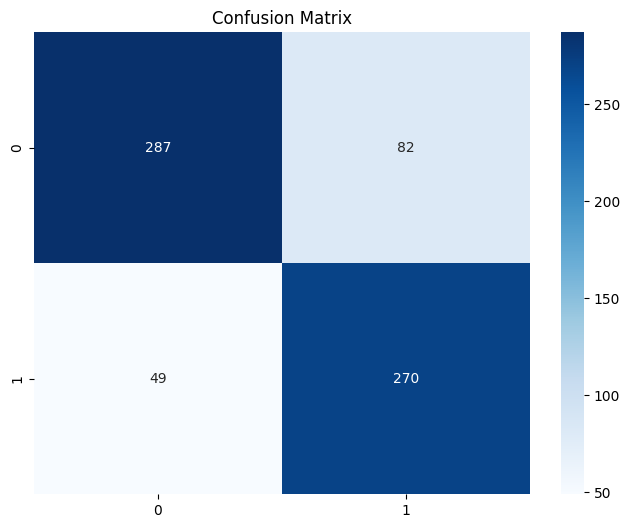

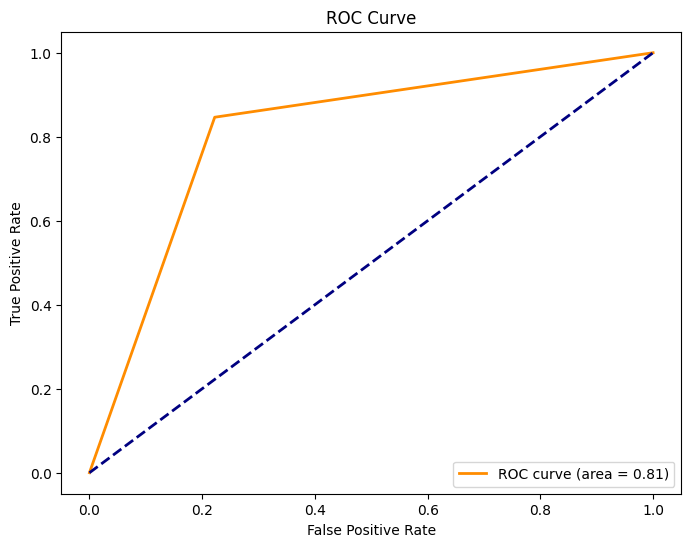

In [9]:
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
GBC_classifier = GradientBoostingClassifier()
GBC_classifier.fit(X_train, y_train)

# Make predictions
y_pred_gbc_I = GBC_classifier.predict(X_test)

# Calculate and print metrics
accuracy = accuracy_score(y_test, y_pred_gbc_I)
precision = precision_score(y_test, y_pred_gbc_I)
recall = recall_score(y_test, y_pred_gbc_I)
f1 = f1_score(y_test, y_pred_gbc_I)
roc_auc = roc_auc_score(y_test, y_pred_gbc_I)
average_precision = average_precision_score(y_test, y_pred_gbc_I)
mcc = matthews_corrcoef(y_test, y_pred_gbc_I)
logloss = log_loss(y_test, y_pred_gbc_I)
balanced_acc = balanced_accuracy_score(y_test, y_pred_gbc_I)
conf_matrix = confusion_matrix(y_test, y_pred_gbc_I)
class_report = classification_report(y_test, y_pred_gbc_I)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("AUC-ROC:", roc_auc)
print("AUC-PR (Average Precision):", average_precision)
print("Matthew's Correlation Coefficient (MCC):", mcc)
print("Log Loss:", logloss)
print("Balanced Accuracy:", balanced_acc)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_gbc_I)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


External Validation

Accuracy: 0.8895348837209303
Precision: 0.9075425790754258
Recall: 0.8674418604651163
F1-Score: 0.8870392390011891
AUC-ROC: 0.8895348837209304
AUC-PR (Average Precision): 0.8535194930119392
Matthew's Correlation Coefficient (MCC): 0.779831413424864
Log Loss: 3.981566362751314
Balanced Accuracy: 0.8895348837209303
Confusion Matrix:
[[392  38]
 [ 57 373]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       430
           1       0.91      0.87      0.89       430

    accuracy                           0.89       860
   macro avg       0.89      0.89      0.89       860
weighted avg       0.89      0.89      0.89       860



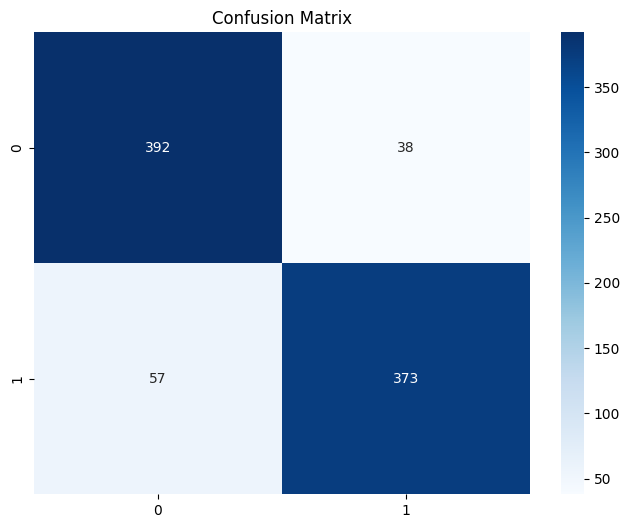

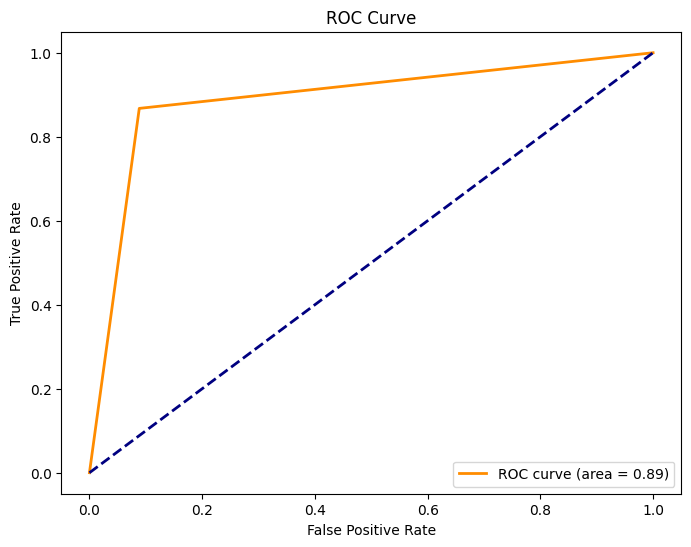

In [10]:
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
GBC_classifier = GradientBoostingClassifier()
GBC_classifier.fit(X_train, y_train)

# Make predictions
y_pred_gbc_E = GBC_classifier.predict(X_test_external)

# Calculate and print metrics
accuracy = accuracy_score(y_test_external, y_pred_gbc_E)
precision = precision_score(y_test_external, y_pred_gbc_E)
recall = recall_score(y_test_external, y_pred_gbc_E)
f1 = f1_score(y_test_external, y_pred_gbc_E)
roc_auc = roc_auc_score(y_test_external, y_pred_gbc_E)
average_precision = average_precision_score(y_test_external, y_pred_gbc_E)
mcc = matthews_corrcoef(y_test_external, y_pred_gbc_E)
logloss = log_loss(y_test_external, y_pred_gbc_E)
balanced_acc = balanced_accuracy_score(y_test_external, y_pred_gbc_E)
conf_matrix = confusion_matrix(y_test_external, y_pred_gbc_E)
class_report = classification_report(y_test_external, y_pred_gbc_E)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("AUC-ROC:", roc_auc)
print("AUC-PR (Average Precision):", average_precision)
print("Matthew's Correlation Coefficient (MCC):", mcc)
print("Log Loss:", logloss)
print("Balanced Accuracy:", balanced_acc)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test_external, y_pred_gbc_E)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


# Quadratic Discrminant Analysis

internal Validation

/home/shree_xd/.local/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy: 0.8183139534883721
Precision: 0.8391608391608392
Recall: 0.7523510971786834
F1-Score: 0.7933884297520661
AUC-ROC: 0.8138449252831086
AUC-PR (Average Precision): 0.7461691594473908
Matthew's Correlation Coefficient (MCC): 0.6351226308161723
Log Loss: 6.548628886104133
Balanced Accuracy: 0.8138449252831086
Confusion Matrix:
[[323  46]
 [ 79 240]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       369
           1       0.84      0.75      0.79       319

    accuracy                           0.82       688
   macro avg       0.82      0.81      0.82       688
weighted avg       0.82      0.82      0.82       688



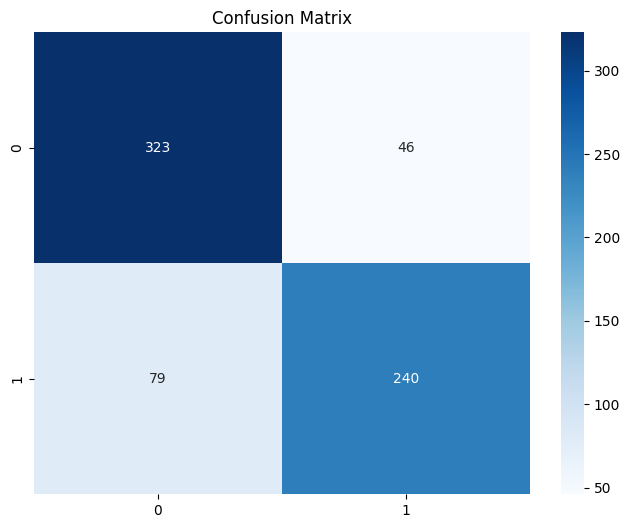

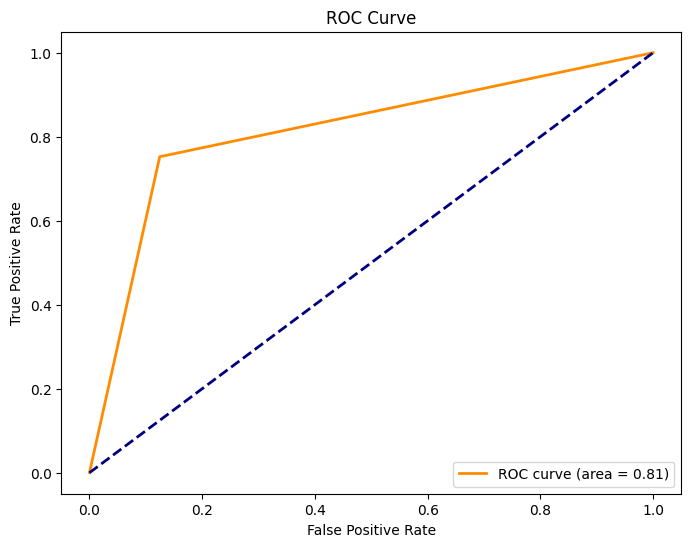

In [11]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda_classifier = QuadraticDiscriminantAnalysis()
qda_classifier.fit(X_train, y_train)

# Make predictions
y_pred_qda_I = qda_classifier.predict(X_test)

# Calculate and print metrics
accuracy = accuracy_score(y_test, y_pred_qda_I)
precision = precision_score(y_test, y_pred_qda_I)
recall = recall_score(y_test, y_pred_qda_I)
f1 = f1_score(y_test, y_pred_qda_I)
roc_auc = roc_auc_score(y_test, y_pred_qda_I)
average_precision = average_precision_score(y_test, y_pred_qda_I)
mcc = matthews_corrcoef(y_test, y_pred_qda_I)
logloss = log_loss(y_test, y_pred_qda_I)
balanced_acc = balanced_accuracy_score(y_test, y_pred_qda_I)
conf_matrix = confusion_matrix(y_test, y_pred_qda_I)
class_report = classification_report(y_test, y_pred_qda_I)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("AUC-ROC:", roc_auc)
print("AUC-PR (Average Precision):", average_precision)
print("Matthew's Correlation Coefficient (MCC):", mcc)
print("Log Loss:", logloss)
print("Balanced Accuracy:", balanced_acc)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_qda_I)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


External Validation

/home/shree_xd/.local/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy: 0.8290697674418605
Precision: 0.9609120521172638
Recall: 0.686046511627907
F1-Score: 0.8005427408412483
AUC-ROC: 0.8290697674418603
AUC-PR (Average Precision): 0.8162071055223088
Matthew's Correlation Coefficient (MCC): 0.6868385807324661
Log Loss: 6.160950056046769
Balanced Accuracy: 0.8290697674418605
Confusion Matrix:
[[418  12]
 [135 295]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.97      0.85       430
           1       0.96      0.69      0.80       430

    accuracy                           0.83       860
   macro avg       0.86      0.83      0.83       860
weighted avg       0.86      0.83      0.83       860



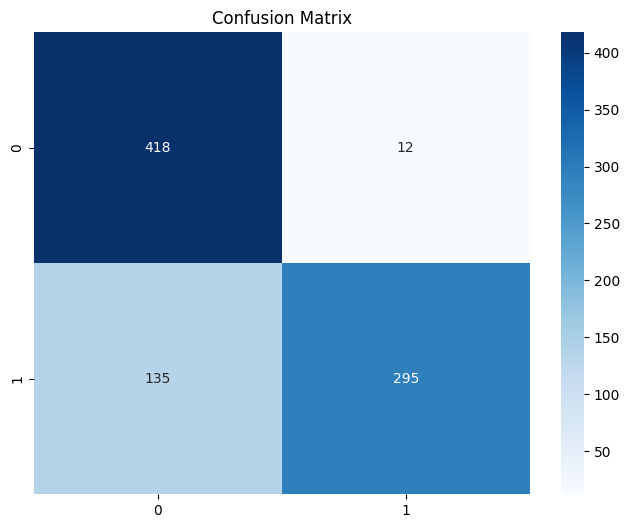

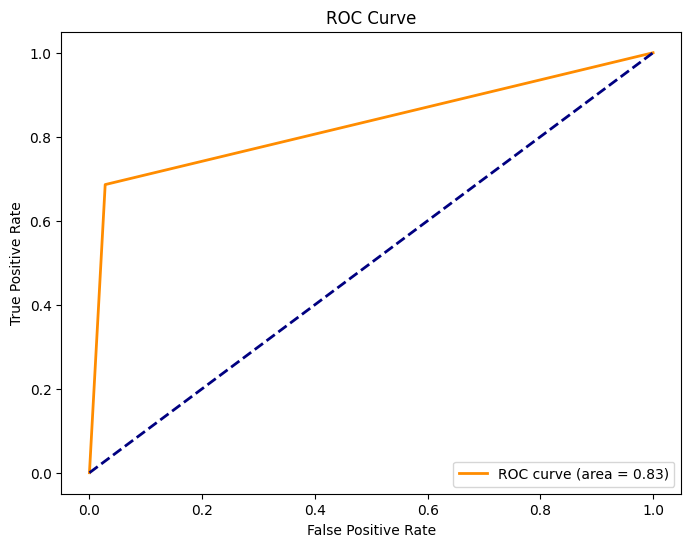

In [12]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda_classifier = QuadraticDiscriminantAnalysis()
qda_classifier.fit(X_train, y_train)

# Make predictions
y_pred_gbc_E = qda_classifier.predict(X_test_external)

# Calculate and print metrics
accuracy = accuracy_score(y_test_external, y_pred_gbc_E)
precision = precision_score(y_test_external, y_pred_gbc_E)
recall = recall_score(y_test_external, y_pred_gbc_E)
f1 = f1_score(y_test_external, y_pred_gbc_E)
roc_auc = roc_auc_score(y_test_external, y_pred_gbc_E)
average_precision = average_precision_score(y_test_external, y_pred_gbc_E)
mcc = matthews_corrcoef(y_test_external, y_pred_gbc_E)
logloss = log_loss(y_test_external, y_pred_gbc_E)
balanced_acc = balanced_accuracy_score(y_test_external, y_pred_gbc_E)
conf_matrix = confusion_matrix(y_test_external, y_pred_gbc_E)
class_report = classification_report(y_test_external, y_pred_gbc_E)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("AUC-ROC:", roc_auc)
print("AUC-PR (Average Precision):", average_precision)
print("Matthew's Correlation Coefficient (MCC):", mcc)
print("Log Loss:", logloss)
print("Balanced Accuracy:", balanced_acc)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test_external, y_pred_gbc_E)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


# Random Forest

Internal validation

Accuracy: 0.8066860465116279
Precision: 0.790625
Recall: 0.7931034482758621
F1-Score: 0.7918622848200313
AUC-ROC: 0.8057658162788526
AUC-PR (Average Precision): 0.722977646351243
Matthew's Correlation Coefficient (MCC): 0.6114043899975723
Log Loss: 6.967741134814798
Balanced Accuracy: 0.8057658162788525
Confusion Matrix:
[[302  67]
 [ 66 253]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       369
           1       0.79      0.79      0.79       319

    accuracy                           0.81       688
   macro avg       0.81      0.81      0.81       688
weighted avg       0.81      0.81      0.81       688



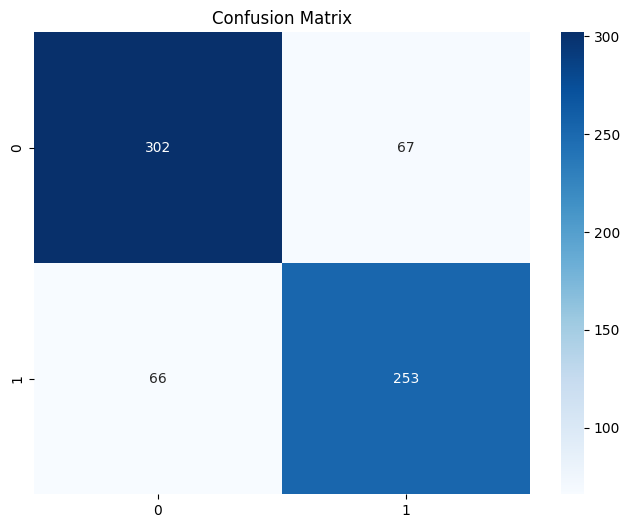

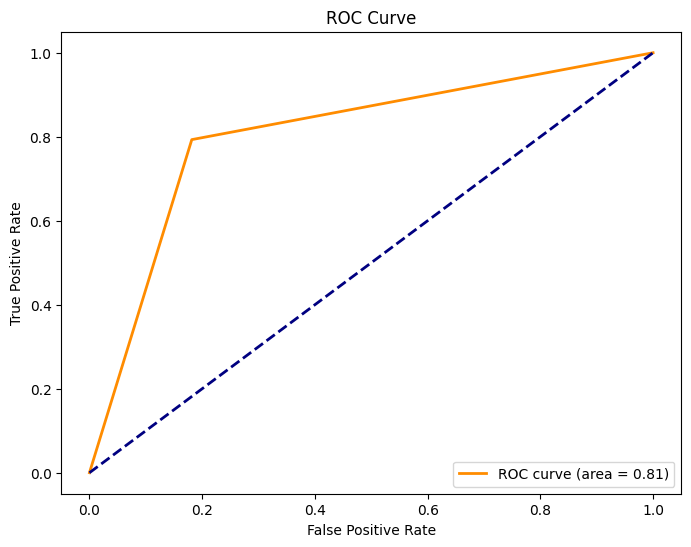

In [13]:
from sklearn.ensemble import RandomForestClassifier
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train, y_train)

# Make predictions
y_pred_rf_I = random_forest_classifier.predict(X_test)

# Calculate and print metrics
accuracy = accuracy_score(y_test, y_pred_rf_I)
precision = precision_score(y_test, y_pred_rf_I)
recall = recall_score(y_test, y_pred_rf_I)
f1 = f1_score(y_test, y_pred_rf_I)
roc_auc = roc_auc_score(y_test, y_pred_rf_I)
average_precision = average_precision_score(y_test, y_pred_rf_I)
mcc = matthews_corrcoef(y_test, y_pred_rf_I)
logloss = log_loss(y_test, y_pred_rf_I)
balanced_acc = balanced_accuracy_score(y_test, y_pred_rf_I)
conf_matrix = confusion_matrix(y_test, y_pred_rf_I)
class_report = classification_report(y_test, y_pred_rf_I)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("AUC-ROC:", roc_auc)
print("AUC-PR (Average Precision):", average_precision)
print("Matthew's Correlation Coefficient (MCC):", mcc)
print("Log Loss:", logloss)
print("Balanced Accuracy:", balanced_acc)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf_I)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


External Validation

Accuracy: 0.8686046511627907
Precision: 0.9390581717451524
Recall: 0.7883720930232558
F1-Score: 0.8571428571428571
AUC-ROC: 0.8686046511627907
AUC-PR (Average Precision): 0.8461412098176899
Matthew's Correlation Coefficient (MCC): 0.7468878394124364
Log Loss: 4.73596841043051
Balanced Accuracy: 0.8686046511627907
Confusion Matrix:
[[408  22]
 [ 91 339]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       430
           1       0.94      0.79      0.86       430

    accuracy                           0.87       860
   macro avg       0.88      0.87      0.87       860
weighted avg       0.88      0.87      0.87       860



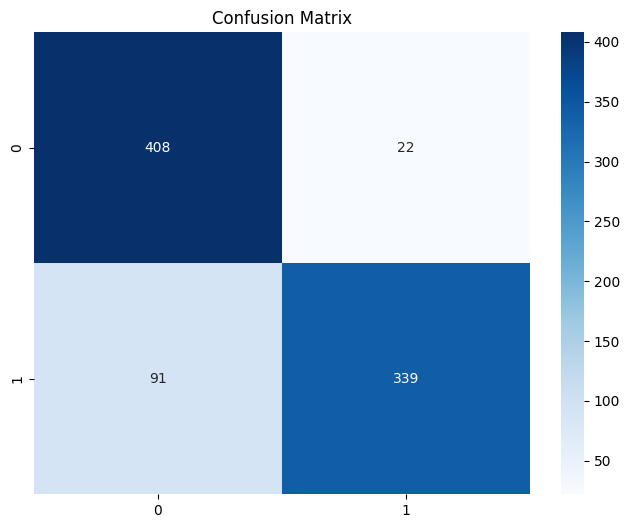

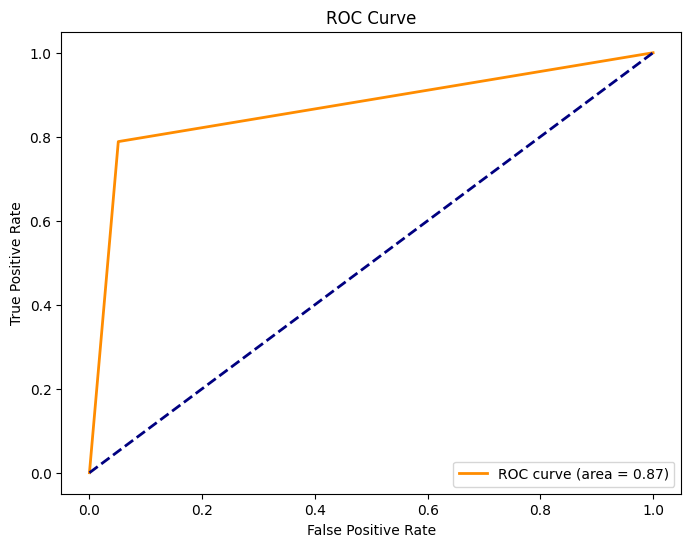

In [14]:
from sklearn.ensemble import RandomForestClassifier
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train, y_train)

# Make predictions
y_pred_rf_E = random_forest_classifier.predict(X_test_external)

# Calculate and print metrics
accuracy = accuracy_score(y_test_external, y_pred_rf_E)
precision = precision_score(y_test_external, y_pred_rf_E)
recall = recall_score(y_test_external, y_pred_rf_E)
f1 = f1_score(y_test_external, y_pred_rf_E)
roc_auc = roc_auc_score(y_test_external, y_pred_rf_E)
average_precision = average_precision_score(y_test_external, y_pred_rf_E)
mcc = matthews_corrcoef(y_test_external, y_pred_rf_E)
logloss = log_loss(y_test_external, y_pred_rf_E)
balanced_acc = balanced_accuracy_score(y_test_external, y_pred_rf_E)
conf_matrix = confusion_matrix(y_test_external, y_pred_rf_E)
class_report = classification_report(y_test_external, y_pred_rf_E)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("AUC-ROC:", roc_auc)
print("AUC-PR (Average Precision):", average_precision)
print("Matthew's Correlation Coefficient (MCC):", mcc)
print("Log Loss:", logloss)
print("Balanced Accuracy:", balanced_acc)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test_external, y_pred_rf_E)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


# CatBoost

internal validation

Learning rate set to 0.015873
0:	learn: 0.6898095	total: 325ms	remaining: 5m 25s
1:	learn: 0.6859235	total: 529ms	remaining: 4m 24s
2:	learn: 0.6828579	total: 739ms	remaining: 4m 5s
3:	learn: 0.6793980	total: 961ms	remaining: 3m 59s
4:	learn: 0.6758309	total: 1.18s	remaining: 3m 54s
5:	learn: 0.6728047	total: 1.4s	remaining: 3m 52s
6:	learn: 0.6698207	total: 1.64s	remaining: 3m 52s
7:	learn: 0.6674403	total: 1.87s	remaining: 3m 51s
8:	learn: 0.6646196	total: 2.11s	remaining: 3m 52s
9:	learn: 0.6619979	total: 2.36s	remaining: 3m 53s
10:	learn: 0.6592065	total: 2.61s	remaining: 3m 54s
11:	learn: 0.6564062	total: 2.85s	remaining: 3m 55s
12:	learn: 0.6543195	total: 3.1s	remaining: 3m 55s
13:	learn: 0.6515567	total: 3.34s	remaining: 3m 55s
14:	learn: 0.6485906	total: 3.58s	remaining: 3m 54s
15:	learn: 0.6463064	total: 3.84s	remaining: 3m 56s
16:	learn: 0.6438193	total: 4.08s	remaining: 3m 56s
17:	learn: 0.6408417	total: 4.33s	remaining: 3m 56s
18:	learn: 0.6380256	total: 4.59s	remaining: 3m

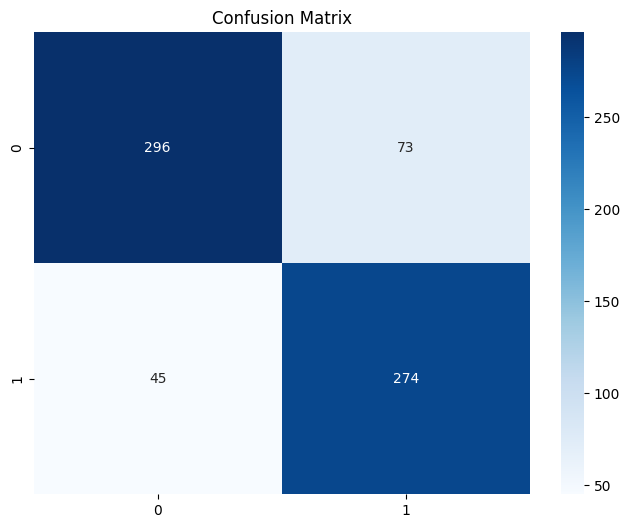

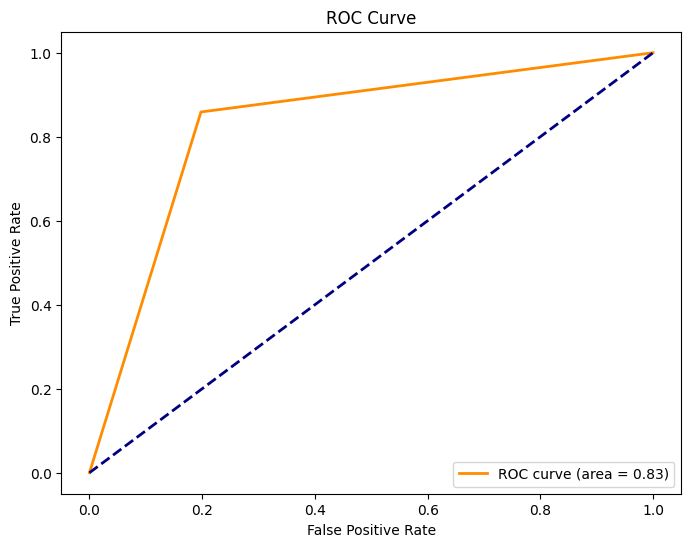

In [15]:
from catboost import CatBoostClassifier
catboost_classifier = CatBoostClassifier()
catboost_classifier.fit(X_train, y_train)

# Make predictions
y_pred_cb_I = catboost_classifier.predict(X_test)

# Calculate and print metrics
accuracy = accuracy_score(y_test, y_pred_cb_I)
precision = precision_score(y_test, y_pred_cb_I)
recall = recall_score(y_test, y_pred_cb_I)
f1 = f1_score(y_test, y_pred_cb_I)
roc_auc = roc_auc_score(y_test, y_pred_cb_I)
average_precision = average_precision_score(y_test, y_pred_cb_I)
mcc = matthews_corrcoef(y_test, y_pred_cb_I)
logloss = log_loss(y_test, y_pred_cb_I)
balanced_acc = balanced_accuracy_score(y_test, y_pred_cb_I)
conf_matrix = confusion_matrix(y_test, y_pred_cb_I)
class_report = classification_report(y_test, y_pred_cb_I)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("AUC-ROC:", roc_auc)
print("AUC-PR (Average Precision):", average_precision)
print("Matthew's Correlation Coefficient (MCC):", mcc)
print("Log Loss:", logloss)
print("Balanced Accuracy:", balanced_acc)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_cb_I)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


external validation

Learning rate set to 0.015873
0:	learn: 0.6898095	total: 260ms	remaining: 4m 19s
1:	learn: 0.6859235	total: 471ms	remaining: 3m 55s
2:	learn: 0.6828579	total: 693ms	remaining: 3m 50s
3:	learn: 0.6793980	total: 916ms	remaining: 3m 47s
4:	learn: 0.6758309	total: 1.14s	remaining: 3m 47s
5:	learn: 0.6728047	total: 1.37s	remaining: 3m 46s
6:	learn: 0.6698207	total: 1.59s	remaining: 3m 46s
7:	learn: 0.6674403	total: 1.82s	remaining: 3m 46s
8:	learn: 0.6646196	total: 2.07s	remaining: 3m 47s
9:	learn: 0.6619979	total: 2.31s	remaining: 3m 48s
10:	learn: 0.6592065	total: 2.55s	remaining: 3m 49s
11:	learn: 0.6564062	total: 2.8s	remaining: 3m 50s
12:	learn: 0.6543195	total: 3.03s	remaining: 3m 49s
13:	learn: 0.6515567	total: 3.25s	remaining: 3m 49s
14:	learn: 0.6485906	total: 3.49s	remaining: 3m 49s
15:	learn: 0.6463064	total: 3.73s	remaining: 3m 49s
16:	learn: 0.6438193	total: 3.97s	remaining: 3m 49s
17:	learn: 0.6408417	total: 4.2s	remaining: 3m 49s
18:	learn: 0.6380256	total: 4.44s	remaining: 3

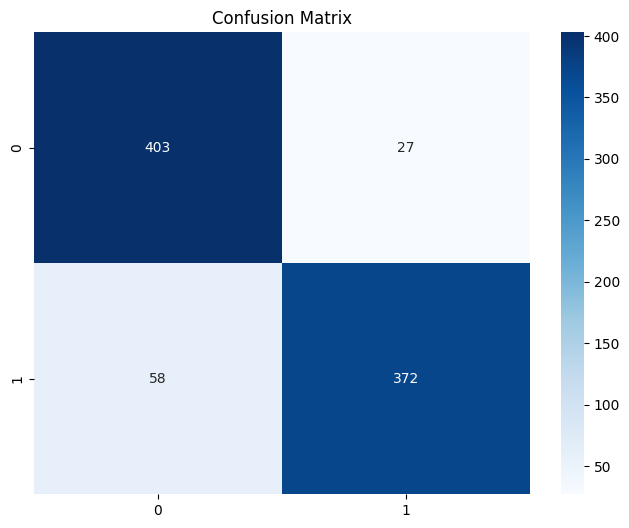

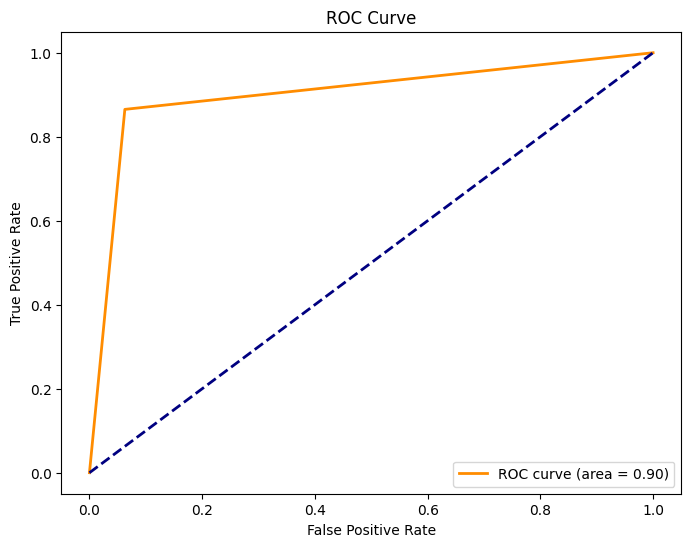

In [16]:
from catboost import CatBoostClassifier
catboost_classifier = CatBoostClassifier()

catboost_classifier.fit(X_train, y_train)

# Make predictions
y_pred_cb_E = catboost_classifier.predict(X_test_external)

# Calculate and print metrics
accuracy = accuracy_score(y_test_external, y_pred_cb_E)
precision = precision_score(y_test_external, y_pred_cb_E)
recall = recall_score(y_test_external, y_pred_cb_E)
f1 = f1_score(y_test_external, y_pred_cb_E)
roc_auc = roc_auc_score(y_test_external, y_pred_cb_E)
average_precision = average_precision_score(y_test_external, y_pred_cb_E)
mcc = matthews_corrcoef(y_test_external, y_pred_cb_E)
logloss = log_loss(y_test_external, y_pred_cb_E)
balanced_acc = balanced_accuracy_score(y_test_external, y_pred_cb_E)
conf_matrix = confusion_matrix(y_test_external, y_pred_cb_E)
class_report = classification_report(y_test_external, y_pred_cb_E)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("AUC-ROC:", roc_auc)
print("AUC-PR (Average Precision):", average_precision)
print("Matthew's Correlation Coefficient (MCC):", mcc)
print("Log Loss:", logloss)
print("Balanced Accuracy:", balanced_acc)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test_external, y_pred_cb_E)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


# LightGBM

internal validation

[LightGBM] [Info] Number of positive: 1401, number of negative: 1351
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.092313 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 283594
[LightGBM] [Info] Number of data points in the train set: 2752, number of used features: 1323
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.509084 -> initscore=0.036341
[LightGBM] [Info] Start training from score 0.036341
Accuracy: 0.8313953488372093
Precision: 0.799410029498525
Recall: 0.8495297805642633
F1-Score: 0.8237082066869301
AUC-ROC: 0.8326239688729176
AUC-PR (Average Precision): 0.7488900688012183
Matthew's Correlation Coefficient (MCC): 0.6635589311924835
Log Loss: 6.077127606304636
Balanced Accuracy: 0.8326239688729176
Confusion Matrix:
[[301  68]
 [ 48 271]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       369
           1       

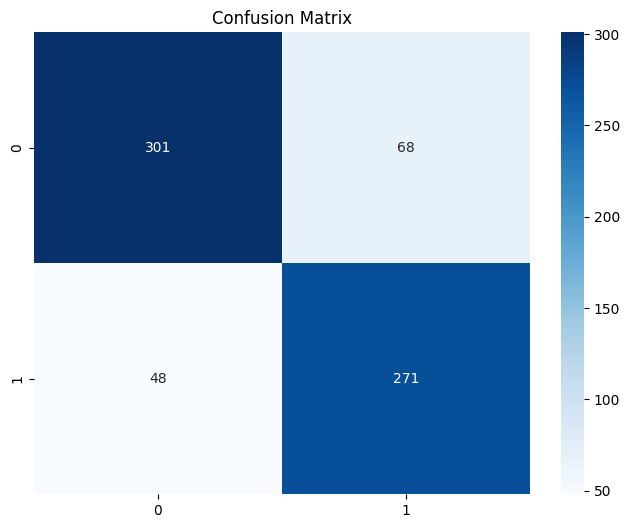

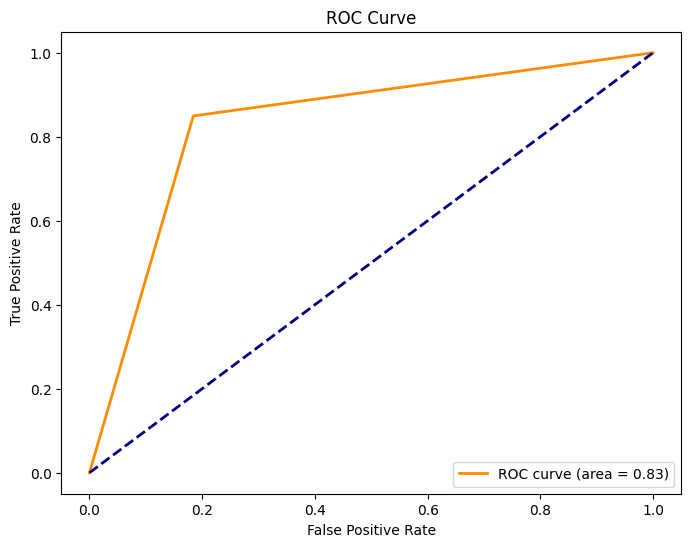

In [17]:

import lightgbm as lgb
lgb_classifier = lgb.LGBMClassifier()
lgb_classifier.fit(X_train, y_train)

# Make predictions
y_pred_lgbm_I = lgb_classifier.predict(X_test)

# Calculate and print metrics
accuracy = accuracy_score(y_test, y_pred_lgbm_I)
precision = precision_score(y_test, y_pred_lgbm_I)
recall = recall_score(y_test, y_pred_lgbm_I)
f1 = f1_score(y_test, y_pred_lgbm_I)
roc_auc = roc_auc_score(y_test, y_pred_lgbm_I)
average_precision = average_precision_score(y_test, y_pred_lgbm_I)
mcc = matthews_corrcoef(y_test, y_pred_lgbm_I)
logloss = log_loss(y_test, y_pred_lgbm_I)
balanced_acc = balanced_accuracy_score(y_test, y_pred_lgbm_I)
conf_matrix = confusion_matrix(y_test, y_pred_lgbm_I)
class_report = classification_report(y_test, y_pred_lgbm_I)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("AUC-ROC:", roc_auc)
print("AUC-PR (Average Precision):", average_precision)
print("Matthew's Correlation Coefficient (MCC):", mcc)
print("Log Loss:", logloss)
print("Balanced Accuracy:", balanced_acc)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lgbm_I)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


external validation

[LightGBM] [Info] Number of positive: 1401, number of negative: 1351
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.095468 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 283594
[LightGBM] [Info] Number of data points in the train set: 2752, number of used features: 1323
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.509084 -> initscore=0.036341
[LightGBM] [Info] Start training from score 0.036341
Accuracy: 0.8906976744186047
Precision: 0.9329896907216495
Recall: 0.8418604651162791
F1-Score: 0.8850855745721271
AUC-ROC: 0.8906976744186047
AUC-PR (Average Precision): 0.8645169024214817
Matthew's Correlation Coefficient (MCC): 0.7851496027220238
Log Loss: 3.939655137880247
Balanced Accuracy: 0.8906976744186046
Confusion Matrix:
[[404  26]
 [ 68 362]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       430
           1      

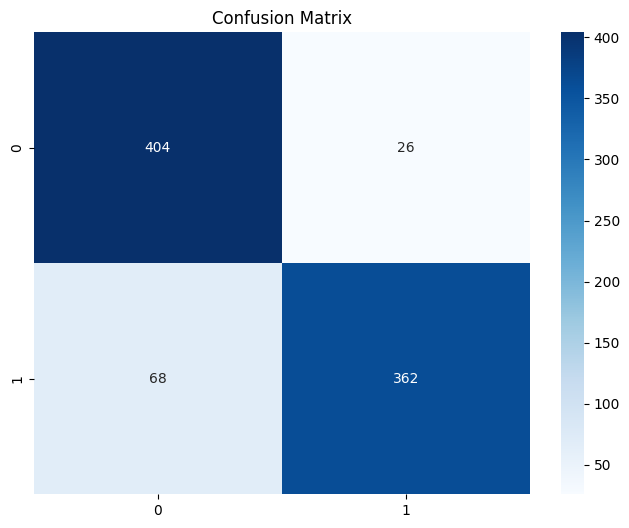

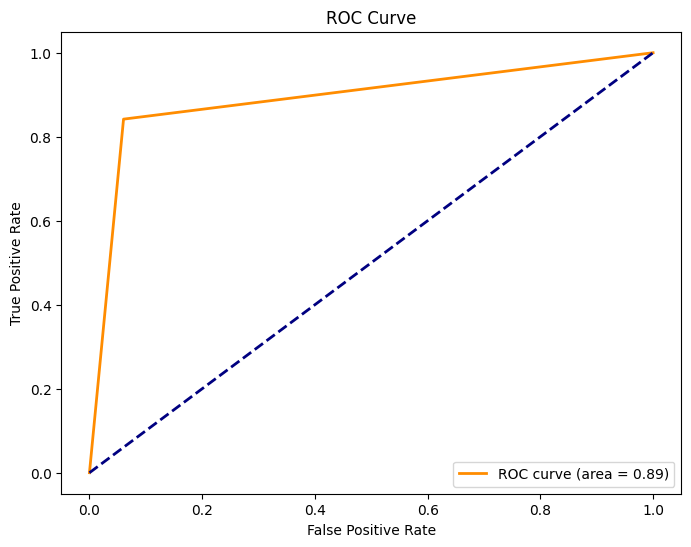

In [18]:
import lightgbm as lgb
lgb_classifier = lgb.LGBMClassifier()
lgb_classifier.fit(X_train, y_train)

# Make predictions
y_pred_lgbm_E = lgb_classifier.predict(X_test_external)

# Calculate and print metrics
accuracy = accuracy_score(y_test_external, y_pred_lgbm_E)
precision = precision_score(y_test_external, y_pred_lgbm_E)
recall = recall_score(y_test_external, y_pred_lgbm_E)
f1 = f1_score(y_test_external, y_pred_lgbm_E)
roc_auc = roc_auc_score(y_test_external, y_pred_lgbm_E)
average_precision = average_precision_score(y_test_external, y_pred_lgbm_E)
mcc = matthews_corrcoef(y_test_external, y_pred_lgbm_E)
logloss = log_loss(y_test_external, y_pred_lgbm_E)
balanced_acc = balanced_accuracy_score(y_test_external, y_pred_lgbm_E)
conf_matrix = confusion_matrix(y_test_external, y_pred_lgbm_E)
class_report = classification_report(y_test_external, y_pred_lgbm_E)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("AUC-ROC:", roc_auc)
print("AUC-PR (Average Precision):", average_precision)
print("Matthew's Correlation Coefficient (MCC):", mcc)
print("Log Loss:", logloss)
print("Balanced Accuracy:", balanced_acc)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test_external, y_pred_lgbm_E)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


# XGBoost

internal Validation

Accuracy: 0.8313953488372093
Precision: 0.792507204610951
Recall: 0.8620689655172413
F1-Score: 0.8258258258258259
AUC-ROC: 0.8334735071488646
AUC-PR (Average Precision): 0.7471493544160163
Matthew's Correlation Coefficient (MCC): 0.6652087151116484
Log Loss: 6.077127606304636
Balanced Accuracy: 0.8334735071488646
Confusion Matrix:
[[297  72]
 [ 44 275]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.80      0.84       369
           1       0.79      0.86      0.83       319

    accuracy                           0.83       688
   macro avg       0.83      0.83      0.83       688
weighted avg       0.83      0.83      0.83       688



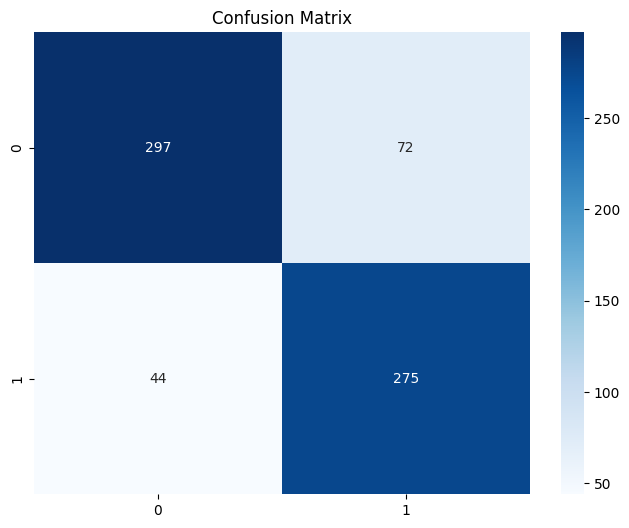

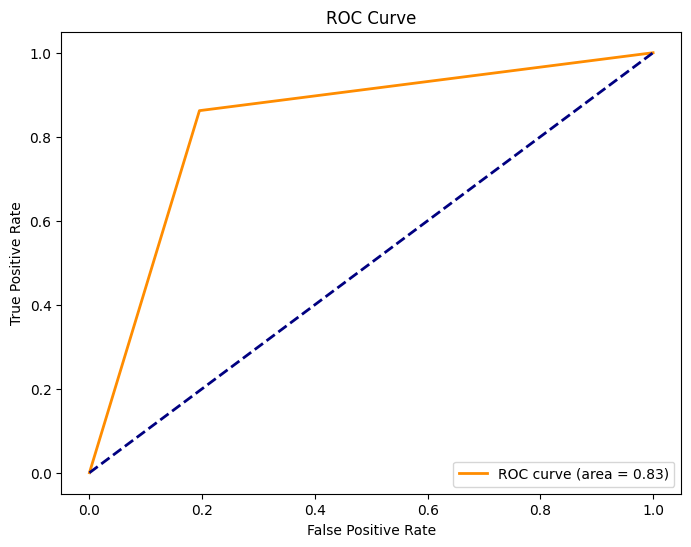

In [19]:
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train, y_train)

# Make predictions
y_pred_xgb_I = xgb_classifier.predict(X_test)

# Calculate and print metrics
accuracy = accuracy_score(y_test, y_pred_xgb_I)
precision = precision_score(y_test, y_pred_xgb_I)
recall = recall_score(y_test, y_pred_xgb_I)
f1 = f1_score(y_test, y_pred_xgb_I)
roc_auc = roc_auc_score(y_test, y_pred_xgb_I)
average_precision = average_precision_score(y_test, y_pred_xgb_I)
mcc = matthews_corrcoef(y_test, y_pred_xgb_I)
logloss = log_loss(y_test, y_pred_xgb_I)
balanced_acc = balanced_accuracy_score(y_test, y_pred_xgb_I)
conf_matrix = confusion_matrix(y_test, y_pred_xgb_I)
class_report = classification_report(y_test, y_pred_xgb_I)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("AUC-ROC:", roc_auc)
print("AUC-PR (Average Precision):", average_precision)
print("Matthew's Correlation Coefficient (MCC):", mcc)
print("Log Loss:", logloss)
print("Balanced Accuracy:", balanced_acc)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgb_I)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


external validation

Accuracy: 0.9127906976744186
Precision: 0.9493670886075949
Recall: 0.872093023255814
F1-Score: 0.9090909090909091
AUC-ROC: 0.9127906976744187
AUC-PR (Average Precision): 0.8918899028554607
Matthew's Correlation Coefficient (MCC): 0.8283298819660155
Log Loss: 3.1433418653299836
Balanced Accuracy: 0.9127906976744187
Confusion Matrix:
[[410  20]
 [ 55 375]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.92       430
           1       0.95      0.87      0.91       430

    accuracy                           0.91       860
   macro avg       0.92      0.91      0.91       860
weighted avg       0.92      0.91      0.91       860



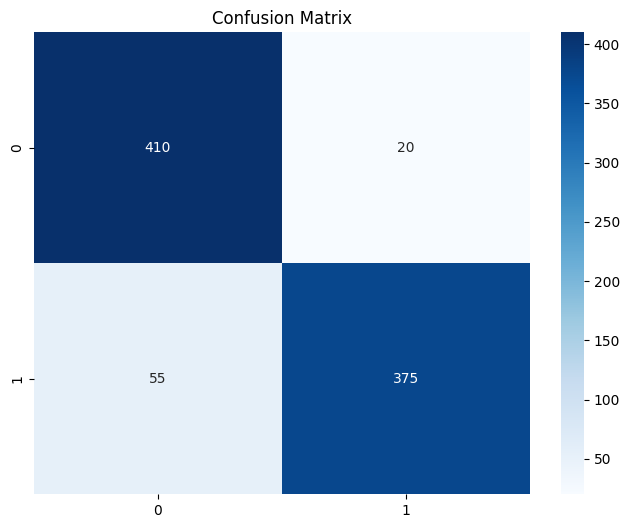

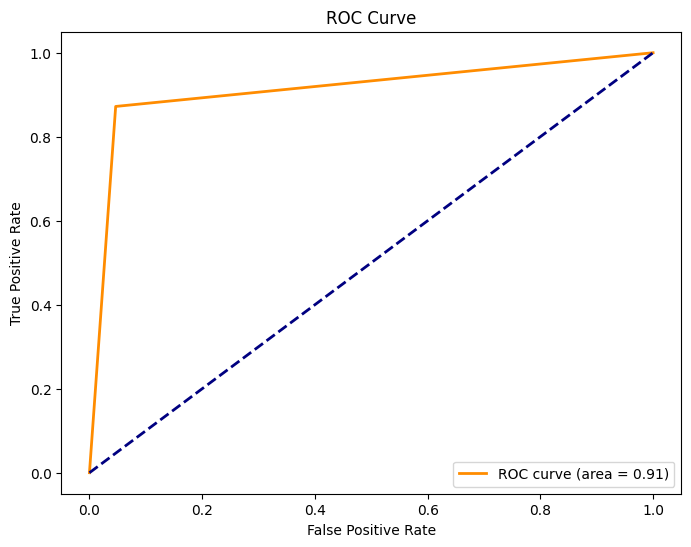

In [20]:
import xgboost as xgb

xgb_classifier = xgb.XGBClassifier()

xgb_classifier .fit(X_train, y_train)

# Make predictions
y_pred_xgb_E = xgb_classifier .predict(X_test_external)

# Calculate and print metrics
accuracy = accuracy_score(y_test_external, y_pred_xgb_E)
precision = precision_score(y_test_external, y_pred_xgb_E)
recall = recall_score(y_test_external, y_pred_xgb_E)
f1 = f1_score(y_test_external, y_pred_xgb_E)
roc_auc = roc_auc_score(y_test_external, y_pred_xgb_E)
average_precision = average_precision_score(y_test_external, y_pred_xgb_E)
mcc = matthews_corrcoef(y_test_external, y_pred_xgb_E)
logloss = log_loss(y_test_external, y_pred_xgb_E)
balanced_acc = balanced_accuracy_score(y_test_external, y_pred_xgb_E)
conf_matrix = confusion_matrix(y_test_external, y_pred_xgb_E)
class_report = classification_report(y_test_external, y_pred_xgb_E)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("AUC-ROC:", roc_auc)
print("AUC-PR (Average Precision):", average_precision)
print("Matthew's Correlation Coefficient (MCC):", mcc)
print("Log Loss:", logloss)
print("Balanced Accuracy:", balanced_acc)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test_external, y_pred_xgb_E)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


# Simple ensemble

internal validation

In [21]:
from collections import Counter
all_predictions = np.array([y_pred_xgb_I, y_pred_lgbm_I, y_pred_cb_I, y_pred_rf_I, y_pred_gbc_I])

y_pred_I = []

for i in range(len(y_pred_xgb_I)):  

    preds_at_i = all_predictions[:, i]
    
    most_common_prediction = Counter(preds_at_i).most_common(1)[0][0]
    
    y_pred_I.append(most_common_prediction)

y_pred_I = np.array(y_pred_I)

print("Final Voted Predictions:", y_pred_I)

Final Voted Predictions: [0 0 0 1 1 1 0 1 0 1 0 1 0 0 1 0 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 1 1 0 1 1 1
 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0
 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1 0
 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1 0 0
 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1 0
 0 1 0 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1
 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 0 0 1
 1 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 1 1 0 0 1 1 0 1 0 0 1 0 1 1 0 0
 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0
 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 0 1 1 1 0 1 0 1 0 0
 1 1 1 0 1 0 0 1 1 0 1 1 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 1 1 0 1 1 0 1 0
 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0 0 1 1 1 1 0 1 1 0 0 1 0 1 0 1 1 0
 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 1 0 1 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 0 1 1 0


Accuracy: 0.8255813953488372
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.80      0.83       369
           1       0.79      0.85      0.82       319

    accuracy                           0.83       688
   macro avg       0.83      0.83      0.83       688
weighted avg       0.83      0.83      0.83       688

Confusion Matrix:


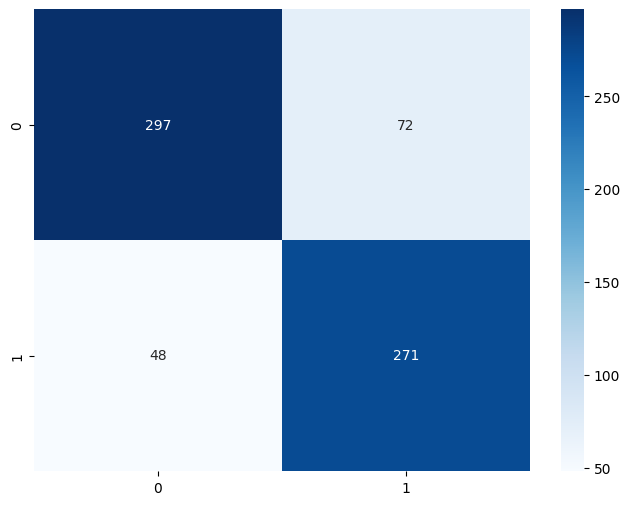

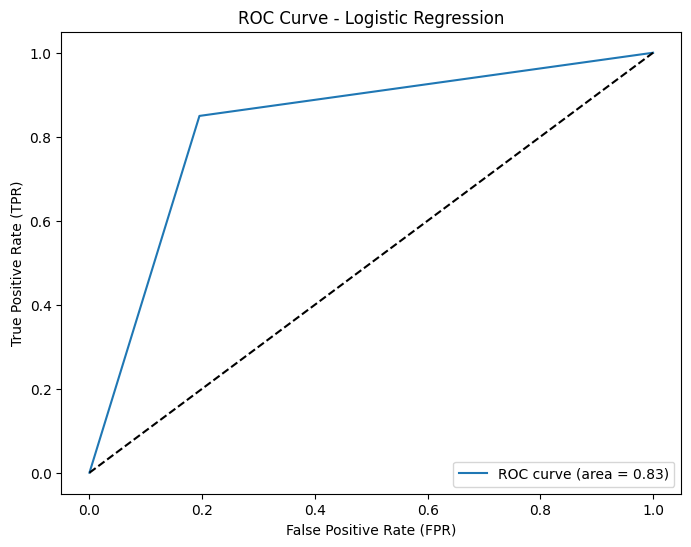

In [23]:

accuracy = accuracy_score(y_test, y_pred_I)
print("Accuracy:", accuracy)
print('Classification Report:')
print(classification_report(y_test, y_pred_I))
print('Confusion Matrix:')
cm = confusion_matrix(y_test, y_pred_I)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.show()


fpr, tpr, thresholds = roc_curve(y_test, y_pred_I)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

external validation

In [24]:
from collections import Counter
all_predictions = np.array([y_pred_xgb_E, y_pred_lgbm_E, y_pred_cb_E, y_pred_rf_E, y_pred_gbc_E])

y_pred_E = []

for i in range(len(y_pred_xgb_E)):  

    preds_at_i = all_predictions[:, i]
    
    most_common_prediction = Counter(preds_at_i).most_common(1)[0][0]
    
    y_pred_E.append(most_common_prediction)

y_pred_E = np.array(y_pred_E)

print("Final Voted Predictions:", y_pred_E)

Final Voted Predictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1


Accuracy: 0.8988372093023256
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.90       430
           1       0.95      0.84      0.89       430

    accuracy                           0.90       860
   macro avg       0.90      0.90      0.90       860
weighted avg       0.90      0.90      0.90       860

Confusion Matrix:


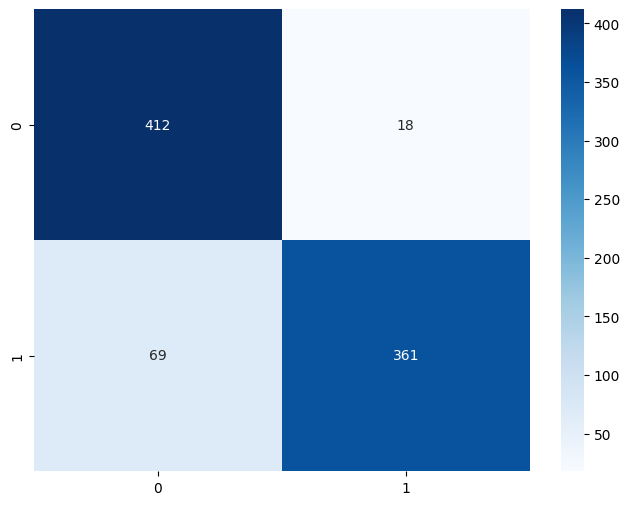

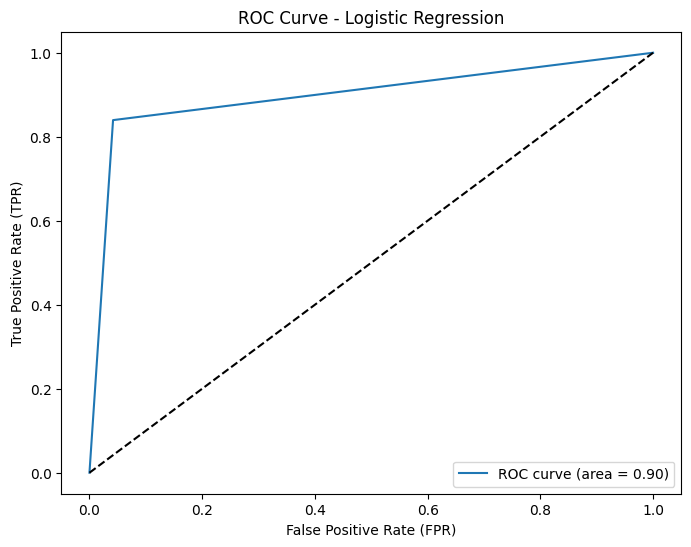

In [27]:

accuracy = accuracy_score(y_test_external, y_pred_E)
print("Accuracy:", accuracy)
print('Classification Report:')
print(classification_report(y_test_external, y_pred_E))
print('Confusion Matrix:')
cm = confusion_matrix(y_test_external, y_pred_E)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.show()


fpr, tpr, thresholds = roc_curve(y_test_external, y_pred_E)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()